In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

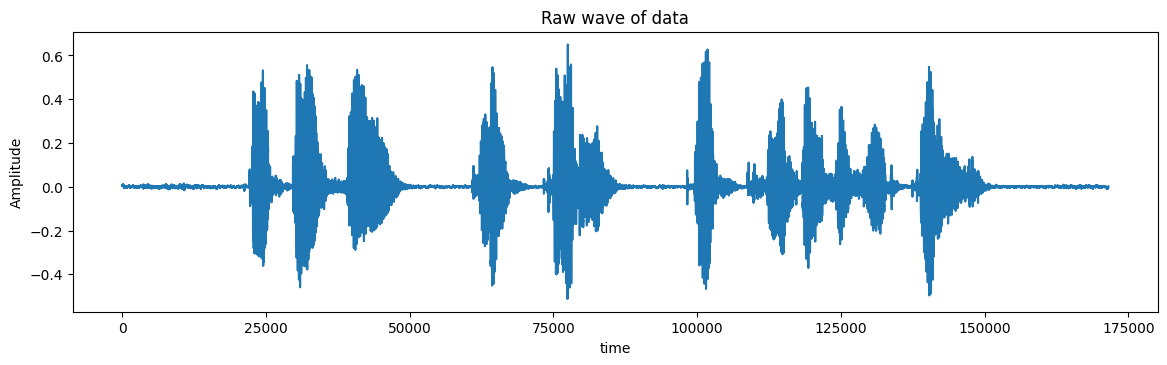

In [4]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali(lang)/ben_0001.wav', sr = 40000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

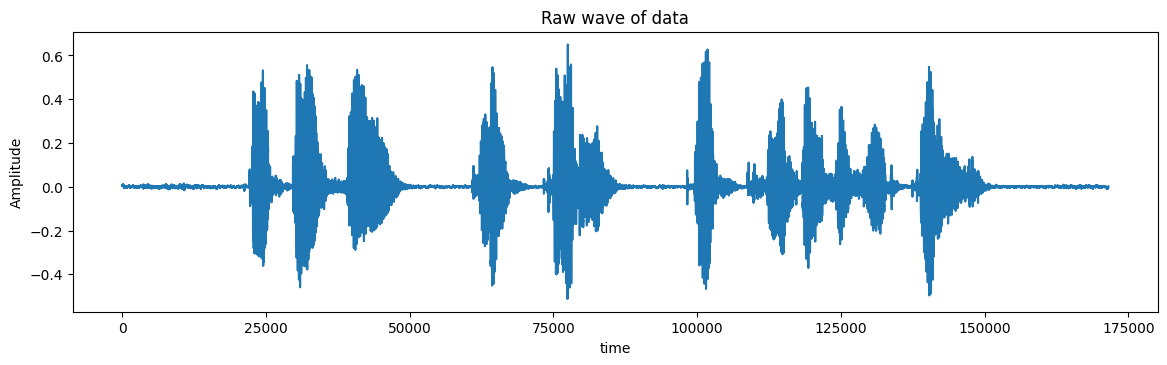

In [5]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali(lang)/ben_0001.wav', sr = 40000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

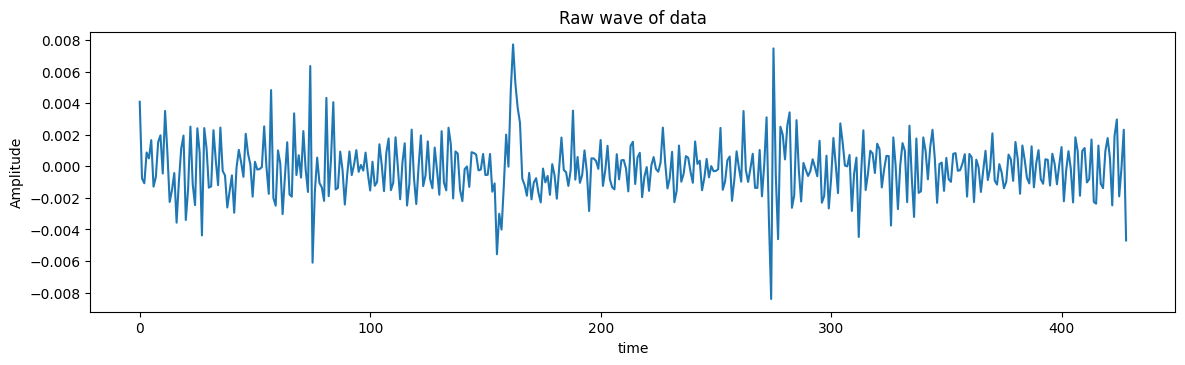

In [6]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali(lang)/ben_0001.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

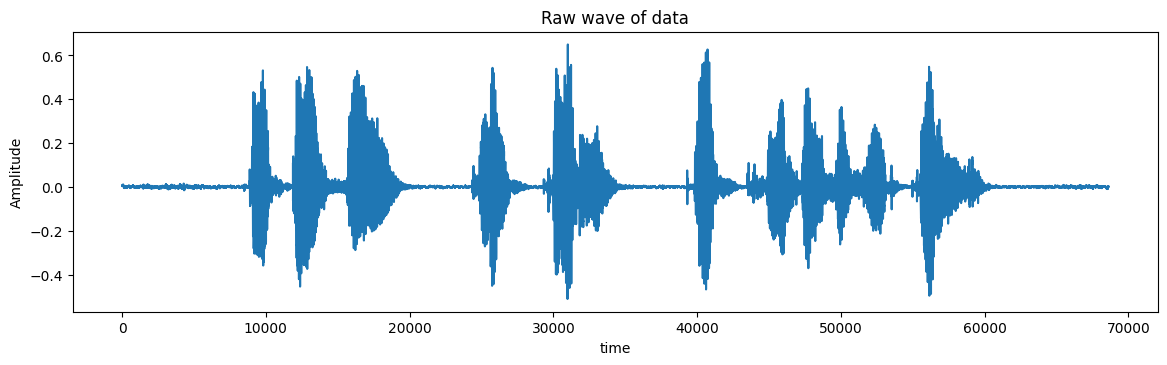

In [7]:
sample_rate=16000
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali(lang)/ben_0001.wav', sr = sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)
ipd.Audio(samples, rate=sample_rate)


In [8]:
import os
import librosa
from sklearn.model_selection import train_test_split
path="/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets"

os.listdir(path)

['Bengali(lang)',
 'Hindi(lang)',
 'Kannada(lang)',
 'Malayalam(lang)',
 'Marathi(lang)',
 'Tamil(lang)',
 'Telugu(lang)']

In [9]:
audio_list=[]
label_list=[]
full_path_list=[]
for j in os.listdir(path):
  for i in os.listdir(path+'/'+j):
    audio_list.append(i)
    label_list.append(j)
    full_path=path+"/"+j+"/"+i
    full_path_list.append(full_path)

In [10]:
metadata1=pd.DataFrame(full_path_list,columns=['full path'])
metadata2=pd.DataFrame(label_list,columns=['Class'])
final_metadata = pd.concat([metadata1, metadata2], axis=1)

In [11]:
final_metadata

,full path,Class
0,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Bengali(lang)
1,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Bengali(lang)
2,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Bengali(lang)
3,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Bengali(lang)
4,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Bengali(lang)
...,...,...
6582,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu(lang)
6583,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu(lang)
6584,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu(lang)
6585,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu(lang)


In [12]:
final_metadata.to_csv("/content/drive/MyDrive/daatframe.csv")

In [13]:
labels=os.listdir(path)
labels

['Bengali(lang)',
 'Hindi(lang)',
 'Kannada(lang)',
 'Malayalam(lang)',
 'Marathi(lang)',
 'Tamil(lang)',
 'Telugu(lang)']

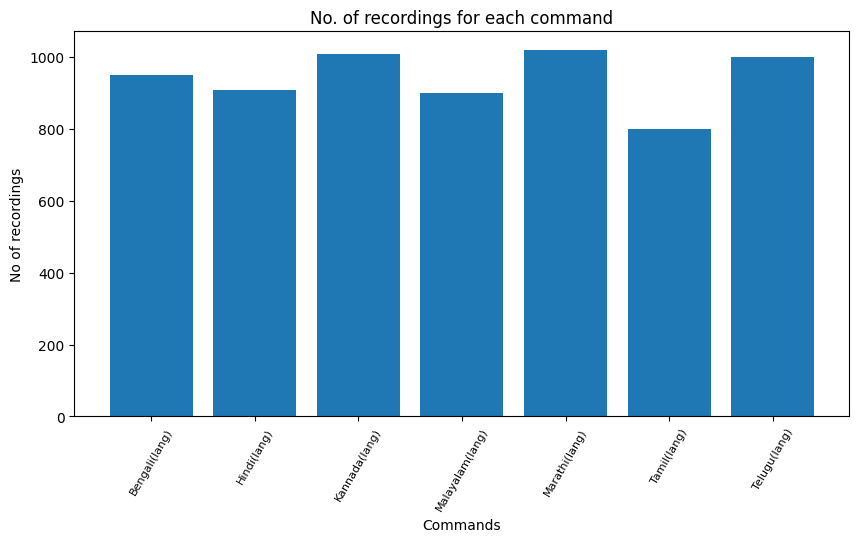

In [14]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

#plot
plt.figure(figsize=(10,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=10)
plt.ylabel('No of recordings', fontsize=10)
plt.xticks(index, labels, fontsize=8, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

# converting audio to spectrogram

In [21]:
list_path=['Kannada(lang)',
 'Hindi(lang)',
 'Bengali(lang)',
 'Marathi(lang)',
 'Tamil(lang)',
 'Malayalam(lang)',
 'Telugu(lang)']

full_wav_files=[]
final_list=[]
for j in list_path:
  path_name=path+"/"+j
  # print(path_name)
  for k in os.listdir(path_name):

    final_list.append(k[0:3])
    full_wav_files.append(path_name+"/"+k)

In [22]:
import pandas as pd
df1=pd.DataFrame(final_list,columns=['Class'])
df2=pd.DataFrame(full_wav_files,columns=['Path'])

df3=pd.concat([df1,df2], axis=1)

In [ ]:
df3.to_csv("/content/drive/MyDrive/main_dataset_list.csv")

In [15]:
spectro_direcvtory="/content/drive/MyDrive/spectrogram"

In [16]:
from tqdm import tqdm
import glob
import os
from pathlib import Path
import librosa
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [17]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
spect="/content/drive/MyDrive/spectrogram/Kannada"

In [18]:
file1="ben_0001.wav"

In [ ]:
for j in range(len(df3["Path"])):
  # print(df3["Path"][j])
  name=df3["Path"][j]
  # print(name)
  res=name.split('(lang)/')
  k=res[1]
  # print(k)
  if k.endswith('.wav'):
    folder=k[0:3]
    if folder=="kan":
        image_class_dir=spectro_direcvtory+"/Kannada"
    elif folder=="mal":
        image_class_dir=spectro_direcvtory+"/Malayalam"
    elif folder=="ben":
        image_class_dir=spectro_direcvtory+"/Bengali"
    elif folder=="mar":
        image_class_dir=spectro_direcvtory+"/Marathi"
    elif folder=="tel":
        image_class_dir=spectro_direcvtory+"/Telugu"
    elif folder=="tam":
        image_class_dir=spectro_direcvtory+"/Tamil"
    elif folder=="hin":
        image_class_dir=spectro_direcvtory+"/Hindi"

    # print(name)
    signal, sample_rate = librosa.load(name)
    freqs = np.fft.fftfreq(signal.size)

    fft = np.fft.fft(signal)
    spectrum = np.abs(fft)

    f = np.linspace(0, sample_rate, len(spectrum))

    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

    spectrogram = np.abs(stft)

    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)

    image_path = os.path.join(image_class_dir, k.replace('.wav', '.png'))
    plt.savefig(image_path)

        # print(image_path)
        # spec = np.load(image_path)




# Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(final_metadata,final_metadata['Class'],stratify = final_metadata['Class'],test_size = 0.3,random_state = 0)
print(X_train['Class'].value_counts())
print(X_test['Class'].value_counts())

Marathi(lang)      714
Kannada(lang)      705
Telugu(lang)       700
Bengali(lang)      665
Hindi(lang)        636
Malayalam(lang)    630
Tamil(lang)        560
Name: Class, dtype: int64
Marathi(lang)      306
Kannada(lang)      302
Telugu(lang)       300
Bengali(lang)      285
Hindi(lang)        273
Malayalam(lang)    271
Tamil(lang)        240
Name: Class, dtype: int64


# CNN MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/mini project/MFCC.csv')

# Extract features and labels
features = data.drop('label_list', axis=1).values
labels = data['label_list'].values

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the features to range [0, 1]
x_train = x_train.astype('float32') / np.max(features)
x_test = x_test.astype('float32') / np.max(features)

# If the data is in 2D format, reshape it to 3D (num_samples, num_timesteps, num_features)
# Example: x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create the CNN model
model = keras.Sequential([
    layers.Reshape((12, 1), input_shape=(12,)),  # Reshape input for CNN
    layers.Conv1D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 16
epochs = 20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)